<a href="https://colab.research.google.com/github/jhonks13/Data_Science_Projects/blob/main/Previs%C3%A3o_de_vendas_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Definição do problema**

<p align = 'justify'>Esse projeto tem como objetivo realizar um exercício prático de regressão linear simples e múltipla. A base de dados utilizada contém os valores de gastos com propagandas em meios de comunicação (TV, rádio e jornal) e os valores de vendas. Sendo assim, pretende-se desenvolver um modelo de regressão linear seja capaz de prever o valor de venda.</p>

### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm #Testes estatísticos

from sklearn.linear_model import LinearRegression

%matplotlib inline

###Importação da base de dados

In [ ]:
url= 'https://raw.githubusercontent.com/jhonks13/Datasets/main/Advertising.csv'
data = pd.read_csv(url, index_col = 0)

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


###Visualização dos dados

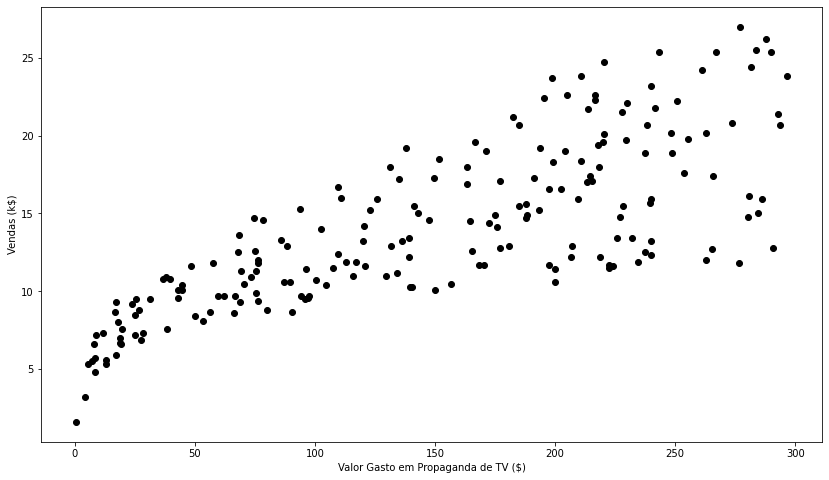

In [ ]:
plt.figure(figsize =(14,8))
plt.scatter(data['TV'], data['sales'], color = 'black')
plt.xlabel('Valor Gasto em Propaganda de TV ($)')
plt.ylabel('Vendas (k$)')
plt.show()

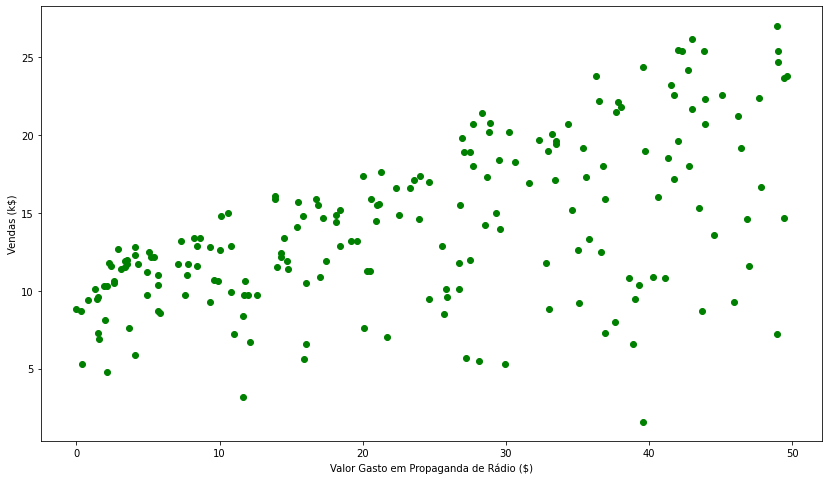

In [ ]:
plt.figure(figsize =(14,8))
plt.scatter(data['radio'], data['sales'], color = 'green')
plt.xlabel('Valor Gasto em Propaganda de Rádio ($)')
plt.ylabel('Vendas (k$)')
plt.show()

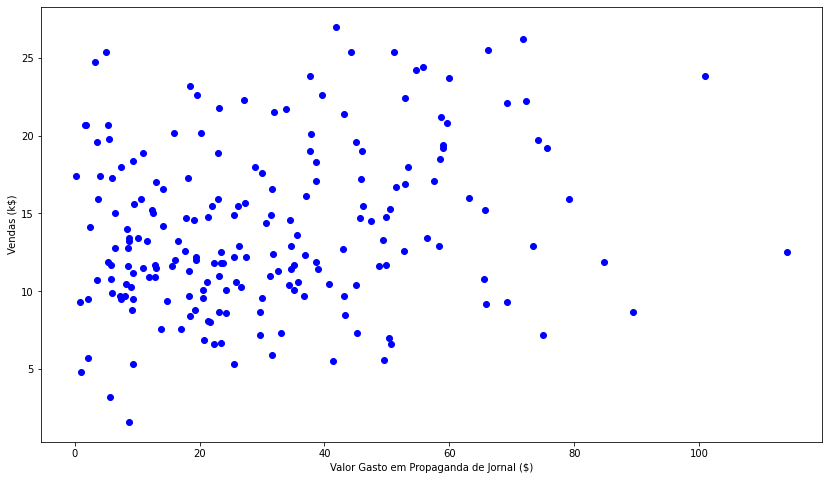

In [ ]:
plt.figure(figsize =(14,8))
plt.scatter(data['newspaper'], data['sales'], color = 'blue')
plt.xlabel('Valor Gasto em Propaganda de Jornal ($)')
plt.ylabel('Vendas (k$)')
plt.show()

##**Regressão Linear Simples**

### Modelo 01

In [ ]:
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)

In [ ]:
# Modelo utilizando a biblioteca Scikit-Learn
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'O modelo linear é: y = {(lr.intercept_.round(4))[0]} + {(lr.coef_.round(4))[0][0]}.TV')

O modelo linear é: y = 7.0326 + 0.0475.TV


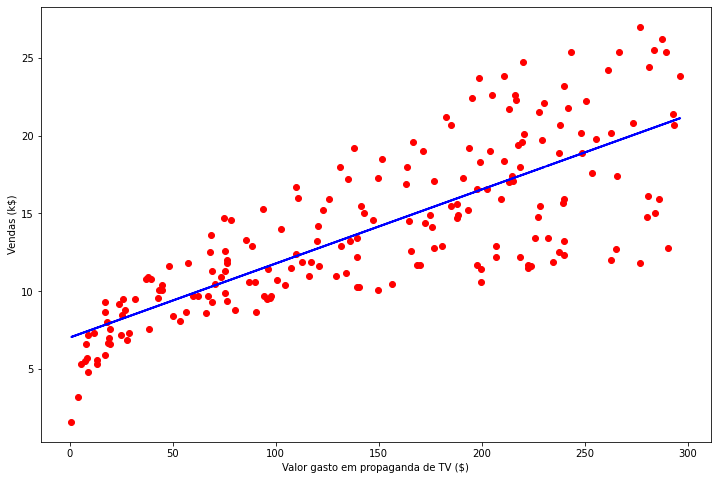

In [ ]:
pred = lr.predict(X)

plt.figure(figsize = (12,8))
plt.scatter(X, y, c = 'red')
plt.plot(X, pred, c = 'blue', linewidth = 2)
plt.xlabel('Valor gasto em propaganda de TV ($)')
plt.ylabel('Vendas (k$)')
plt.show()

###Modelo 02

In [ ]:
X = data['TV']
y = data['sales']

In [ ]:
# Modelo utilizando a biblioteca Statsmodel
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        12:03:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

<p align = 'justify'>Percebe-se que os coeficientes são idênticos ao do modelo anterior. Quanto as métricas, esse modelo explica a 61% da variabilidade dos dados  de resposta conforme o valor de R-quadrado ajustado e possui F-statistic igual a 312,1.</p>

##**Regressão Linear Múltipla**

###Modelo 3

In [ ]:
# Modelo utilizando scikit-learn
X = data.drop(['sales'], axis = 1)
y = data['sales'].values.reshape(-1,1)

In [ ]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'O modelo linear é: y = {(lr.intercept_.round(4))[0]} + {(lr.coef_.round(4))[0][0]}.TV + {(lr.coef_.round(4))[0][1]}.radio + {(lr.coef_.round(4))[0][2]}.newspaper')

O modelo linear é: y = 2.9389 + 0.0458.TV + 0.1885.radio + -0.001.newspaper


<p align = 'justify'>Aqui podemos perceber que o coeficiente da feature "jornal" é negativo, ou seja, pode-se evidenciar um efeito negativo dessa feature no modelo.</p>

###Modelo 4

In [ ]:
# Modelo utilizando statsmodel
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

In [ ]:
exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        12:15:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

<p align = 'justify'>Nota-se que os coeficientes são idênticos ao do modelo anterior. Em relação as métricas, esse modelo explica a 89% da variabilidade dos dados  de resposta conforme o valor de R-quadrado ajustado e possui F-statistic igual a 570,3. Isso evidencia um bom modelo de previsão de valor de venda. Um ponto importante, é que a variável x3, ou seja, feature "Jornal" tem um p-valor maior que 0,05 que surge como indicativo de que essa variável não é relevante para o modelo. </p>